<Figure size 1200x800 with 0 Axes>

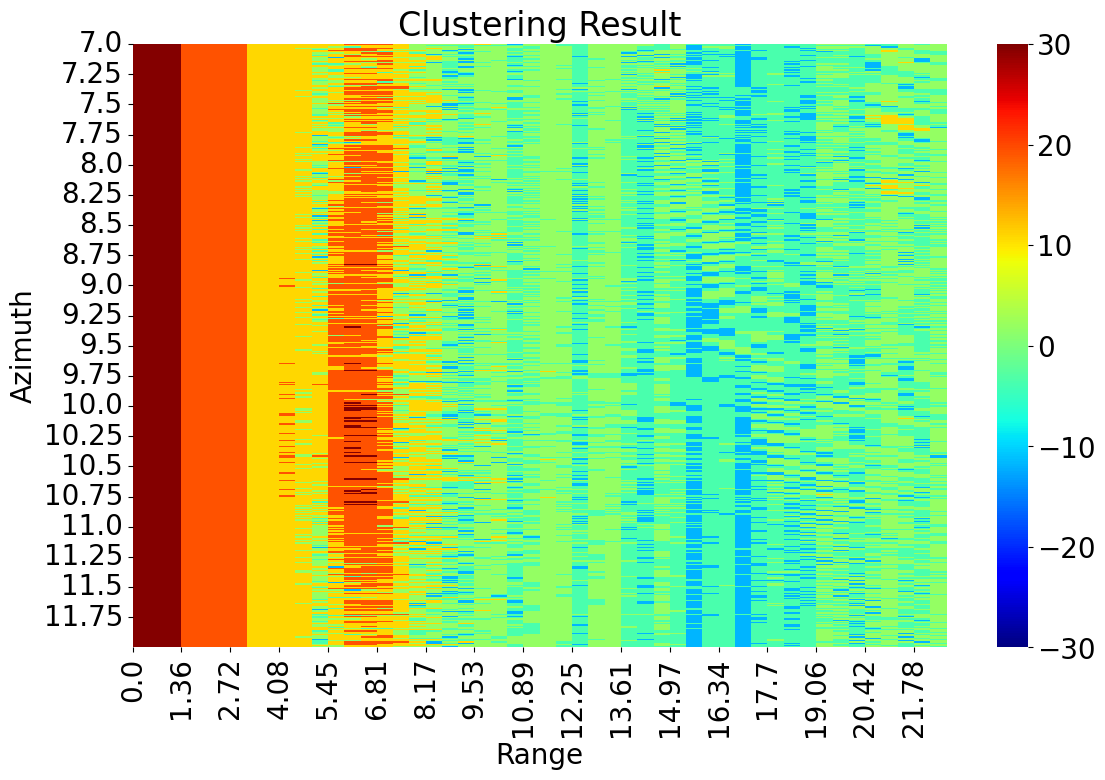

In [29]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# import sys
# sys.path.append(r'/Users/CHJ/文稿/无人机sar/yamakawa/pi_data/SAR_program')
import SA_func as sa

## 引数定義
ch = 8 # channel
ad_samp_point = 512  # レーダのレンジ方向サンプリング数
az_n = 2000 #アジマス方向のピクセル数
az_dt =0.01
light_speed = sa.light_speed
df = sa.df
dr = sa.dr
ad_samp_point = sa.ad_samp_point
chirp_rate = sa.chirp_rate
d_tau = df / chirp_rate 
dir_name = ""
add_name = ""
filename = "/Users/CHJ/文稿/无人机sar/yamakawa/pi_data/1206_data/azimuth_1/fft_data"

fft_data = sa.read_fft_data(filename)
data = sa.code_V_convert(fft_data)
raw_data = sa.get_raw_data(data)
index = [700, 1200, 0, 50]
az_s_index = index[0]
az_e_index = index[1]
az_len = az_e_index - az_s_index
rg_s_index = index[2]
rg_e_index = index[3]
rg_len = rg_e_index - rg_s_index
plt.figure(figsize = (12,8))

# ampを抽出,amp_dataはdb化データ
amp = raw_data[0] #raw_data (2000,512)
amp_data = 20 * np.log10(np.abs(amp[az_s_index:az_e_index, rg_s_index:rg_e_index]))
"amp_data = np.clip(amp_data, -30, 30) #（500，50）"
# print(np.shape(amp_data))
# print(np.shape(raw_data)) #(8, 2000, 512)
# print(np.shape(fft_data)) #(1024000, 8)

# 一列になっているデータを、チャネル、レンジ、アジマス、で多次元配列に変換
    # def get_raw_data(data):
    #     raw_data = np.zeros(data.shape[0] * 8, dtype = np.complex64)
    #     raw_data = np.reshape(raw_data, (8, -1, ad_samp_point))
    #     #print(raw_data)
    #     for TRX in range(ch):
    #         raw_data[TRX] = np.reshape(data[:, TRX], (-1, ad_samp_point))
    #     return raw_data
    # raw_data = get_raw_data(data)

# def read_raw_data(filename):
#     raw_data = np.genfromtxt(filename + ".csv", delimiter = ',')  # 区切り文字としてカンマを指定
#     data = np.zeros(raw_data.shape[0] * ch, dtype = 
#                     np.complex64)
#     data = np.reshape(data, (-1, ch))
#     for TRX in range(ch):
#         for n in range(raw_data.shape[0]):
#             data[n, TRX] = raw_data[n, TRX]
#     raw_data = np.zeros(data.shape[0] * ch, dtype = np.complex64)
#     raw_data = np.reshape(raw_data, (ch, -1, ad_samp_point))
#     #print(raw_data)
#     for TRX in range(ch):
#         raw_data[TRX] = np.reshape(data[:, TRX], (-1, ad_samp_point))
#     return raw_data

# ### 合成開口前の時間領域の生データ画像を保存 ###
# index = [0, sa.az_n, 0, 50] #[az_start, az_end, rg_start, rg_end]
# index = [700, 1200, 0, 50]
# # for TRX in range(sa.ch):
# #     save_name = ["", "range [m]", "azimuth [s]", dir_name + str(TRX) + "_amp" + add_name]
# #     sa.heatmap_imaging("amp", raw_data[TRX], index, dr, sa.az_dt, save_name)
# #     save_name = ["", "range [m]", "azimuth [s]", dir_name + str(TRX) + "_phase" + add_name]
# #     sa.heatmap_imaging("phase", raw_data[TRX], index, dr, sa.az_dt, save_name)


# cluster関数を定義
def cluster_and_plot(data, n_clusters=4, n_init=10):
    all_font = 20
    plt.rcParams["font.size"] = all_font
    az_s_index = index[0]
    az_e_index = index[1]
    az_len = az_e_index - az_s_index
    rg_s_index = index[2]
    rg_e_index = index[3]
    rg_len = rg_e_index - rg_s_index


    # k-meansクラスタリングを行う
    one_dimension_data = np.reshape(data,(-1,1))
    kmeans = KMeans(n_clusters = 6, n_init=n_init, random_state=0).fit(one_dimension_data)
    clustered_pixel_values = kmeans.cluster_centers_[kmeans.labels_]
    clustered_image = np.reshape(clustered_pixel_values, data.shape)
    # labels = kmeans.labels_
    # labels = labels.reshape((az_e_index - az_s_index, rg_e_index - rg_s_index))

    # heatmapを描く
    plt.figure(figsize=(12, 8))
    sns.heatmap(clustered_image, cmap="jet", vmin=-30, vmax=30) 
    name = ["", "range [m]", "azimuth [s]"]
    dx = d_tau * light_speed / 2 / 2
    dy = 0.01
    x_step = int(rg_len / 25) + 1
    y_step = int(az_len / 20)
    plt.xticks(np.arange(0, rg_e_index - rg_s_index, step = x_step), np.round(np.arange(rg_s_index * dx, rg_e_index * dx, step = dx * x_step), 2), fontsize = all_font, rotation = 90)
    plt.yticks(np.arange(0, az_e_index - az_s_index, step = y_step), np.round(np.arange(az_s_index * dy, az_e_index * dy, step = dy * y_step), 2), fontsize = all_font)
    plt.title(name[0])
    plt.xlabel(name[1], fontsize = all_font)
    plt.ylabel(name[2], fontsize = all_font)
    plt.tight_layout()
    plt.xlabel("Range")
    plt.ylabel("Azimuth")
    plt.title("Clustering Result")

# plot
cluster_and_plot(amp_data)

